In [11]:
!pip install scipy

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys, os
import pandas as pd
import numpy as np
import scipy.stats

In [3]:
datapath = "/Users/yyd/Documents/GitHub/RedditIPO-SentimentAnalysis/Data"
os.chdir(datapath)


In [4]:
comments_scored = pd.read_csv('comments_rd.csv')
comments_neg=comments_scored[comments_scored.comment_score<0]
comments_neg_trimm = comments_neg[['comment_body']]
comments_neg_trimm = comments_neg_trimm.to_string()

In [5]:
#czq部分
def subcomment_count(df):
    a=df.comment_parent_id.str.split(pat="_",n=2,expand=True)
    a=a.iloc[:,[1]]
    b=a.apply(lambda x : x.groupby(x).count()).fillna(0)
    b.index.name = 'comment_id'
    b.reset_index(inplace=True)
    b.rename(columns={1:'subcomment_count'}, inplace=True)
    c=df.merge(b, on='comment_id', how='left')
    return c

In [8]:
comment_score=subcomment_count(comments_scored).comment_score
subcomment_count=subcomment_count(comments_scored).subcomment_count

In [7]:
comment_score

0         4
1         2
2         2
3         2
4         1
         ..
15277    23
15278     9
15279     2
15280     5
15281     3
Name: comment_score, Length: 15282, dtype: int64

((array([-3.91417949, -3.69465167, -3.5743804 , ...,  3.5743804 ,
          3.69465167,  3.91417949]),
  array([ -59,  -51,  -45, ..., 5509, 6005, 8444])),
 (49.95650681875691, 22.97480696243946, 0.3083786491779101))

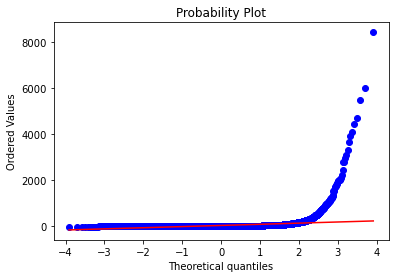

In [15]:
scipy.stats.probplot(comment_score, dist="norm", plot=plt)

In [17]:
comment_score.describe()

count    15282.000000
mean        22.974807
std        161.963098
min        -59.000000
25%          1.000000
50%          3.000000
75%          8.000000
max       8444.000000
Name: comment_score, dtype: float64

((array([-3.91417949, -3.69465167, -3.5743804 , ...,  3.5743804 ,
          3.69465167,  3.91417949]),
  array([ 1.,  1.,  1., ..., nan, nan, nan])),
 (nan, nan, nan))

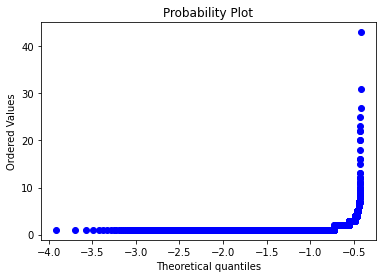

In [18]:
scipy.stats.probplot(subcomment_count, dist="norm", plot=plt)

In [19]:
comments = pd.read_csv('normalized_sentiment_score.csv')